In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as pyplot
import numpy as np
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Загрузите данные ex7data1.mat из файла.

data = loadmat('ex7data1.mat')

x = data['X']
print(x.shape)

(300, 2)


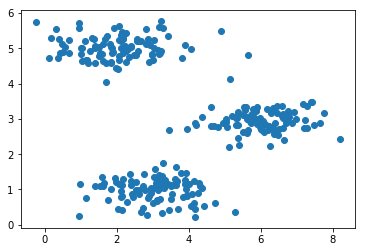

In [3]:
#Постройте график загруженного набора данных.

pyplot.scatter(x[:,0], x[:, 1])
pyplot.show()

In [4]:
#Реализуйте функцию вычисления матрицы ковариации данных.

def getCovMatrix(x):
    return np.cov(x.T)

In [5]:
#Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации 
#(разрешается использовать библиотечные реализации матричных разложений).

def getEigenvectors(x):
    covMatrix = getCovMatrix(x)
    eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
    return eigenvectors

eigenvectors = getEigenvectors(x)

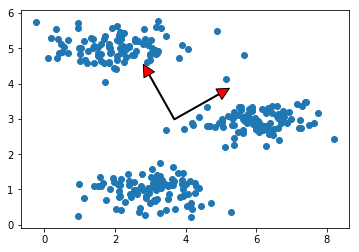

In [6]:
#Постройте на графике из пункта 2 собственные векторы матрицы ковариации.

data = x
mu = data.mean(axis=0)
data = data - mu

projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()

fig, ax = pyplot.subplots()
ax.scatter(x[:,0], x[:, 1])
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate('', xy=end, xycoords='data',
                xytext=start, textcoords='data',
                arrowprops=dict(facecolor='red', width=1.0))
ax.set_aspect('equal')
pyplot.show()

In [7]:
#Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью 
#метода главных компонент.

def dimensionalityReduction(x):
    eigenvectors = getEigenvectors(x)
    v = -eigenvectors[:,1]
    return np.dot(v, x.T), v

xNew, v = dimensionalityReduction(x)

In [8]:
#Реализуйте функцию вычисления обратного преобразования.

def restored(x):
    xNew, v = dimensionalityReduction(x)
    xRestored = []
    for n in range(len(xNew)):
        xRestored.append(np.dot(xNew[n], v)) 

    return np.array(xRestored)

xRestored = restored(x)
print(xRestored)

[[ 2.41790358  4.28245758]
 [ 3.42281161  6.06229529]
 [ 2.94447519  5.21509218]
 [ 2.67658226  4.74061499]
 [ 2.89615176  5.1295044 ]
 [ 2.41346904  4.27460336]
 [ 2.37639651  4.20894253]
 [ 2.70452937  4.79011337]
 [ 2.79349738  4.9476886 ]
 [ 2.77815141  4.92050867]
 [ 2.81188244  4.98025121]
 [ 2.74278553  4.85787058]
 [ 2.40823853  4.26533936]
 [ 2.78258738  4.92836541]
 [ 2.19176852  3.88193961]
 [ 2.6539942   4.70060827]
 [ 3.12008008  5.52611389]
 [ 2.73008498  4.83537605]
 [ 2.24685298  3.97950217]
 [ 2.8350509   5.02128591]
 [ 2.22598821  3.94254765]
 [ 2.88190605  5.10427318]
 [ 2.90332241  5.14220464]
 [ 2.40604512  4.26145451]
 [ 2.32007652  4.10919168]
 [ 2.79474445  4.94989735]
 [ 2.94337125  5.21313694]
 [ 2.58613077  4.58041231]
 [ 2.38726796  4.22819744]
 [ 2.29811694  4.07029808]
 [ 2.86775157  5.07920353]
 [ 2.86680261  5.07752279]
 [ 2.50599464  4.4384796 ]
 [ 3.19123475  5.65213912]
 [ 2.55130703  4.51873441]
 [ 2.87242666  5.0874838 ]
 [ 2.2819053   4.04158491]
 

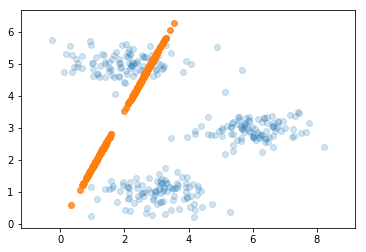

In [9]:
#Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).

pyplot.scatter(x[:, 0], x[:, 1], alpha=0.2)
pyplot.scatter(xRestored[:, 0], xRestored[:, 1], alpha=0.8)
pyplot.axis('equal')
pyplot.show()

In [10]:
#Загрузите данные ex7faces.mat из файла.

data = loadmat('ex7faces.mat')
x = data['X']

print(x.shape)

(5000, 1024)


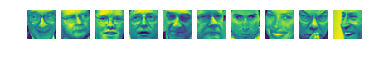

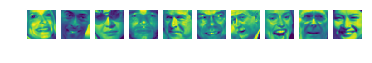

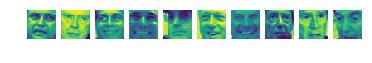

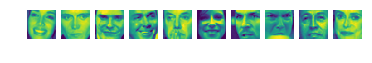

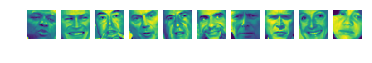

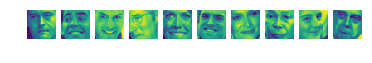

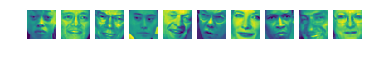

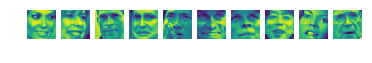

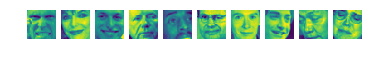

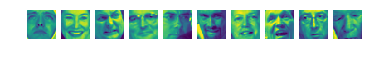

In [11]:
#Визуализируйте 100 случайных изображений из набора данных.

import math

def visualization(x, count=100):
    lines = int(math.ceil(count / 10.0))
    for i in range(lines):
        _, axis = pyplot.subplots(1, 10)
        for j in range(10):
            index = 10*i + j
            if index < count:
                matrix = x[index].reshape(32, 32, order="F")
                axis[j].imshow(matrix)
            axis[j].axis("off")
        pyplot.show()

visualization(x)

In [12]:
#С помощью метода главных компонент вычислите собственные векторы.

eigenvectors = getEigenvectors(x)
print(eigenvectors.shape)


(1024, 1024)


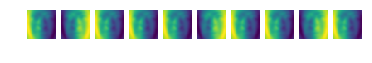

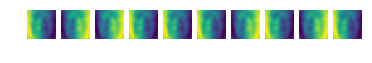

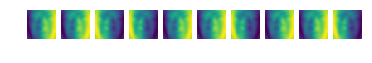

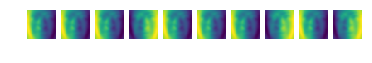

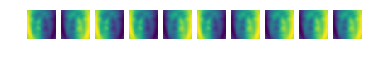

In [13]:
#Визуализируйте 36 главных компонент с наибольшей дисперсией.
#Визуализируйте 100 главных компонент с наибольшей дисперсией.
#Как изменилось качество выбранных изображений?

def imagesVisualization(x, count):
    xRestored = restored(x)
    dispersions = np.array([np.var(value) for value in xRestored])
    indexes = dispersions.argsort()[-count:][::-1]  
    values = np.array([xRestored[index] for index in indexes])
    visualization(values, count)

imagesVisualization(x, 50)

In [14]:
#Используйте изображение, сжатое в лабораторной работе №6 (Кластеризация).

compressedImage = misc.imread('compressedImage.png') 
print(compressedImage.shape)

compressedImage = compressedImage.reshape(16384, 3)
print(compressedImage)


(128, 128, 3)
[[221 186   0]
 [221 186   0]
 [221 186   0]
 ..., 
 [ 58  55   0]
 [ 58  55   0]
 [ 58  55   0]]


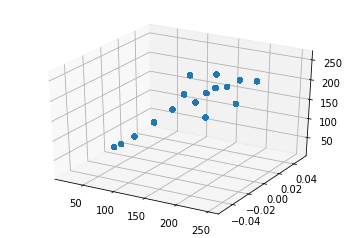

In [15]:
#С помощью метода главных компонент визуализируйте данное изображение в 3D и 2D.

fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(compressedImage[:, 1], compressedImage[:, 2], compressedImage[:, 0])

pyplot.show()

In [16]:
def dimensionalityReduction(x):
    m = x.shape[1]
    eigenvectors = getEigenvectors(x)
    v = -eigenvectors[:,:m-1]
    return np.dot(v.T, x.T), v

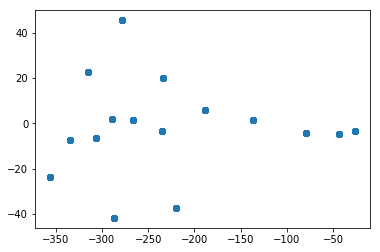

In [17]:
#Соответствует ли 2D изображение какой-либо из проекций в 3D?

xNew, v = dimensionalityReduction(compressedImage)
pyplot.scatter(xNew[0], xNew[1])
pyplot.show()

In [18]:
#Ответы на вопросы представьте в виде отчета. 